In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.drop(labels='Cabin', axis=1,inplace=True)

In [7]:
test.drop(labels='Cabin', axis=1,inplace=True)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Percentage of Women who survived 74.20382165605095
Percentage of Men who survived 18.890814558058924


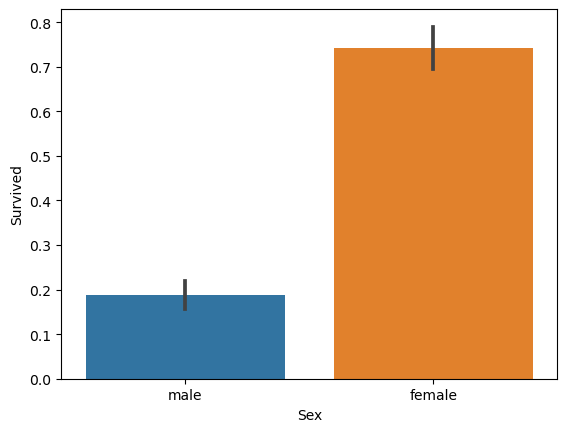

In [9]:
sns.barplot(x='Sex', y='Survived', data=train)
print("Percentage of Women who survived", train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)
print("Percentage of Men who survived", train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

Percentage of PClass=1 who survived 62.96296296296296
Percentage of PClass=2 who survived 47.28260869565217
Percentage of PClass=3 who survived 24.236252545824847


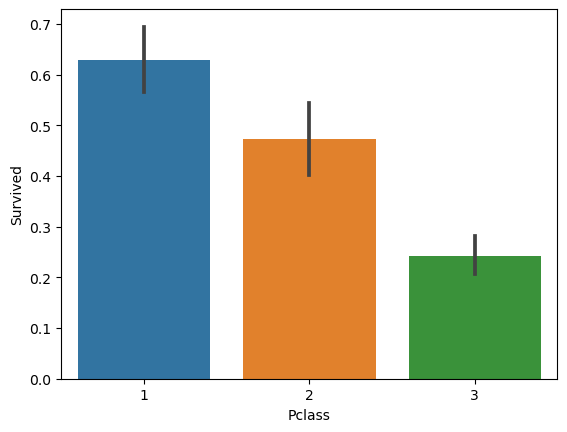

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train)
print("Percentage of PClass=1 who survived", train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)
print("Percentage of PClass=2 who survived", train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)
print("Percentage of PClass=3 who survived", train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

<Axes: xlabel='AgeGroup', ylabel='Survived'>

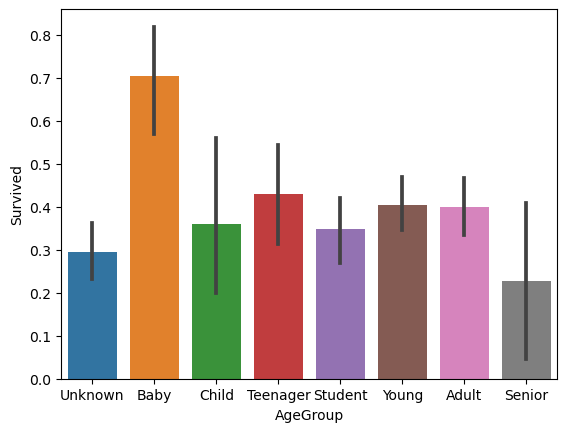

In [11]:
train.Age= train.Age.fillna(-0.5)
train.Age= train.Age.fillna(-0.5)

bins=[-1,0,5,12,18,24,35,60,100]
labels= ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young', 'Adult', 'Senior']

train['AgeGroup']=pd.cut(train['Age'], bins, labels=labels)
test['AgeGroup']=pd.cut(test['Age'], bins, labels=labels)
sns.barplot(x='AgeGroup', y='Survived', data=train)

In [12]:
train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038062,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.011497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.360547,0.083081,0.018443,-0.549500
Age,0.038062,0.011497,-0.360547,1.000000,-0.183470,-0.047017,0.135617
SibSp,-0.057527,-0.035322,0.083081,-0.183470,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.047017,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.135617,0.159651,0.216225,1.000000


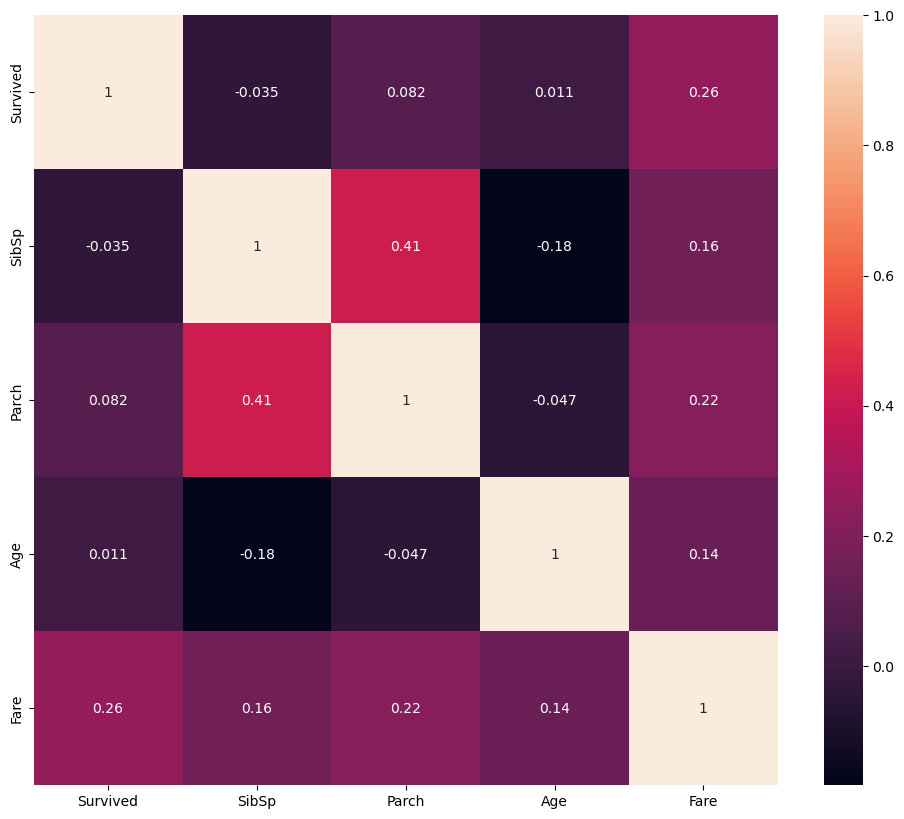

In [13]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True)

In [14]:
train['SibSp'].dtype

dtype('int64')

<Axes: xlabel='SibSp', ylabel='Survived'>

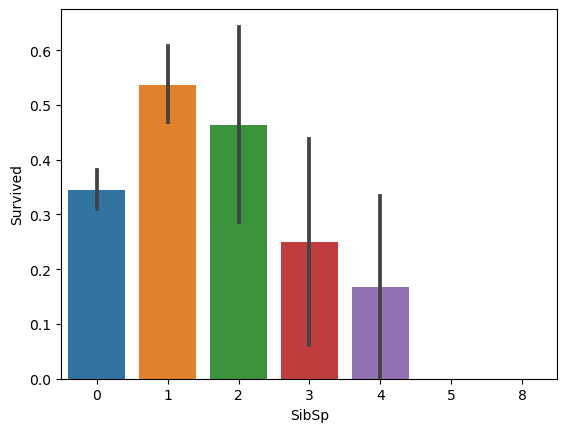

In [15]:
sns.barplot(x = "SibSp", y = "Survived", data = train)

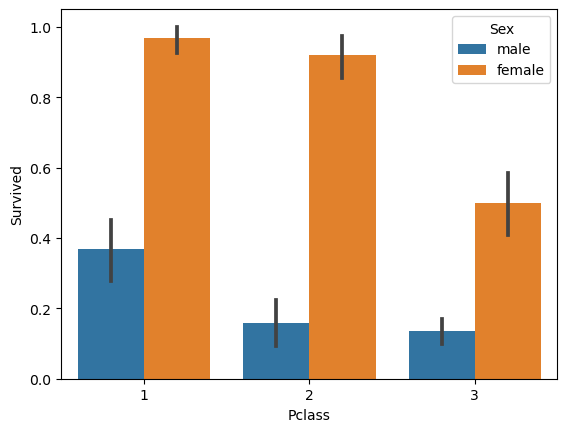

In [16]:
g = sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train)

In [17]:
train["Embarked"].isnull().sum()

2

In [18]:
train["Embarked"] = train["Embarked"].fillna("S")

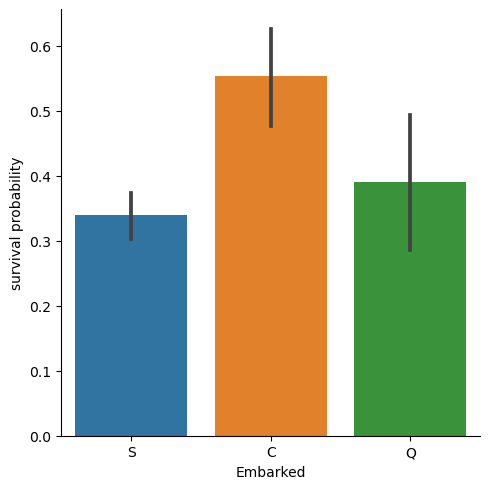

In [19]:
g = sns.catplot(x="Embarked", y="Survived", data=train,kind="bar")
g = g.set_ylabels("survival probability")

<Axes: xlabel='Embarked', ylabel='count'>

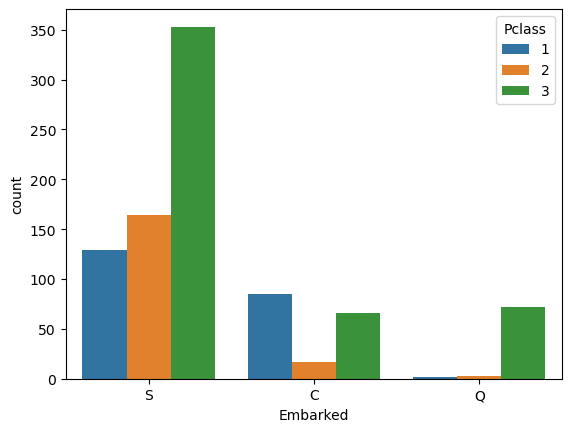

In [20]:
sns.countplot(x='Embarked', hue='Pclass', data=train)

<Axes: xlabel='Embarked', ylabel='count'>

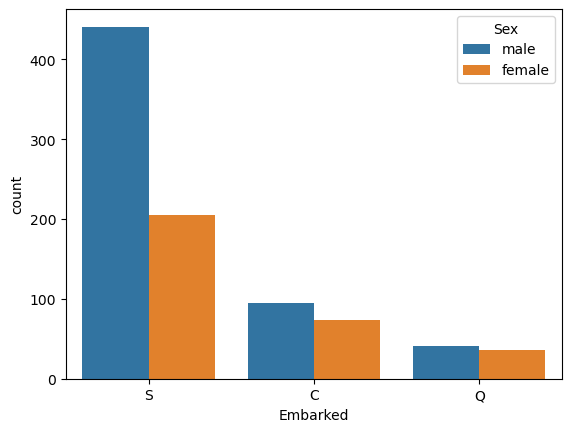

In [21]:
sns.countplot(x='Embarked', hue='Sex', data=train)

<Axes: xlabel='Sex', ylabel='count'>

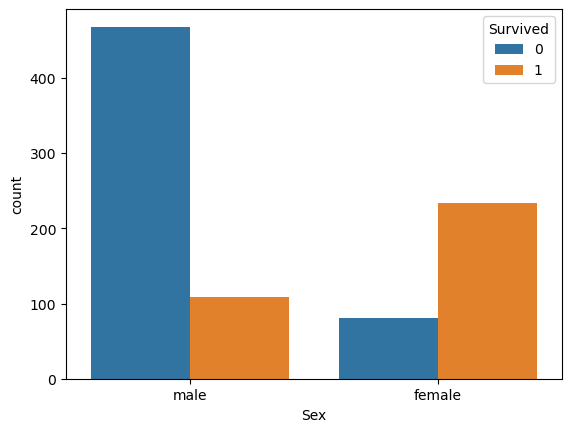

In [22]:
sns.countplot(x='Sex', hue='Survived', data=train)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young


In [24]:
train.drop(labels=['PassengerId', 'Ticket','Name'], axis=1, inplace=True)

In [25]:
train.drop(labels=['AgeGroup'], axis=1, inplace=True)

In [26]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
genders = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(genders)

In [28]:
ports = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(ports)

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [30]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Young
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Young
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Student


In [31]:
test.drop(labels=['PassengerId', 'Ticket','Name','AgeGroup'], axis=1, inplace=True)

In [32]:
genders = {"male": 0, "female": 1}
test['Sex'] = test['Sex'].map(genders)

In [33]:
ports = {"S": 0, "C": 1, "Q": 2}
test['Embarked'] = test['Embarked'].map(ports)

In [34]:
xtrain=train.drop(train.columns[[0]], axis = 1)

In [35]:
ytrain=train['Survived']

In [55]:
xtest=pd.DataFrame(test)

In [37]:
xtrain=pd.DataFrame(xtrain)

In [40]:
ytrain=pd.DataFrame(ytrain)

In [56]:
xtest

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,-0.5,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,-0.5,0,0,8.0500,0


In [57]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [59]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [60]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [65]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(rf_classifier_ypred, logreg_ypred)
svc_classifier_acc = accuracy_score(rf_classifier_ypred, svc_classifier_ypred)

In [63]:
logreg_acc*100

71.70263788968825

In [66]:
svc_classifier_acc*100

79.85611510791367